In [5]:
import tensorflow as tf
import numpy as np 
import tensorflow.contrib.slim as slim
import sys
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '0'
sys.path.append("/home/ubuntu/workspace/models/slim")
from datasets import dataset_utils
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
url = "http://download.tensorflow.org/models/vgg_16_2016_08_28.tar.gz"
checkpoints_dir = './checkpoints'

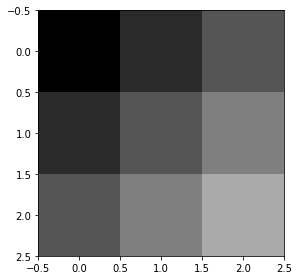

In [9]:
from numpy import ogrid, repeat, newaxis
from skimage import io

# Generate image that will be used for test upsampling
# Number of channels is 3 -- we also treat the number of
# samples like the number of classes, because later on
# that will be used to upsample predictions from the network
imsize = 3
x, y = ogrid[:imsize, :imsize]
img = repeat((x + y)[..., newaxis], 3, 2) / float(imsize + imsize)
io.imshow(img, interpolation='none')

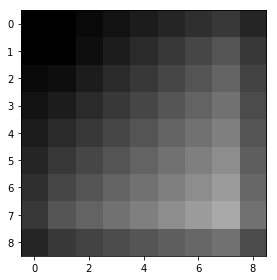

In [10]:
import skimage.transform

def upsample_skimage(factor, input_img):    
    # Pad with 0 values, similar to how Tensorflow does it.
    # Order=1 is bilinear upsampling
    return skimage.transform.rescale(input_img,
                                     factor,
                                     mode='constant',
                                     cval=0,
                                     order=1)


upsampled_img_skimage = upsample_skimage(factor=3, input_img=img)
io.imshow(upsampled_img_skimage, interpolation='none')